# Analyse frequency distribution of words

## Installation des dépendences

In [1]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mastic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Création d'une liste de stopwords

In [2]:
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [3]:
print(f"{len(sw)} stopwords used: {sorted(sw)}")

197 stopwords used: ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', '

## Visualiser les termes les plus fréquents

In [5]:
path = "../data/all.txt"
limit = 10**8

with open(path, encoding='latin-1') as f:
    text = f.read()[:limit]

In [6]:
# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

11096579 words found


In [7]:
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

2796162 words kept (93419 different word forms)


In [14]:
fdist = nltk.FreqDist(kept)
fdist.most_common(50)

[('rue', 38704),
 ('conseil', 19793),
 ('ville', 19005),
 ('section', 15717),
 ('collège', 15389),
 ('francs', 14666),
 ('bruxelles', 12762),
 ('bourgmestre', 11766),
 ('travaux', 11571),
 ('rapport', 10275),
 ('administration', 10034),
 ('art', 9554),
 ('hospices', 7141),
 ('place', 7092),
 ('projet', 6534),
 ('séance', 6523),
 ('demande', 6240),
 ('partie', 6131),
 ('messieurs', 5962),
 ('lieu', 5903),
 ('police', 5887),
 ('prix', 5686),
 ('somme', 5683),
 ('question', 5567),
 ('année', 5547),
 ('publics', 5436),
 ('proposition', 5352),
 ('frais', 5246),
 ('nombre', 5230),
 ('communal', 5190),
 ('finances', 5177),
 ('publique', 5087),
 ('service', 4953),
 ('dépenses', 4854),
 ('droit', 4830),
 ('mètres', 4812),
 ('heures', 4746),
 ('avis', 4660),
 ('hôtel', 4639),
 ('loi', 4495),
 ('compte', 4439),
 ('chez', 4306),
 ('budget', 4231),
 ('enfants', 4203),
 ('marché', 4071),
 ('mois', 4040),
 ('discussion', 3978),
 ('propose', 3861),
 ('général', 3848),
 ('état', 3827)]

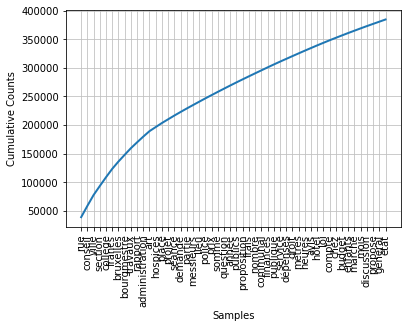

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
fdist.plot(50, cumulative=True)

In [13]:
# Impression des mots qui n'apparaissent qu'une fois dans le corpus
fdist.hapaxes()[:30]

['àes',
 'dîbï',
 'enraisonde',
 'bieniàance',
 'eldeseiànv',
 'gnant',
 'dtput',
 'phonnenr',
 'rèumsderb',
 'marcs',
 'espourvica',
 'lém',
 'demm',
 'imrac',
 'offrantà',
 'dendes',
 'differens',
 'administrera',
 'philanlropique',
 'cefa',
 'advînt',
 'colégataires',
 'inaliénables',
 'legrelle',
 'cemtimes',
 'noretnbre',
 'lichtendael',
 'apet',
 'propriétéestaujourd',
 'huiquitle']

In [11]:
long_words = [w for w in voc if len(w) > 15]
sorted(long_words)[:30]

['aapprovisionnements',
 'abandonnésansindemn',
 'abonncmentannuel',
 'abstractiveinent',
 'accidenlelleinent',
 'accidentellement',
 'accompagnateursdesclassesde',
 'accompagneraient',
 'accomplissementdel',
 'accroîtrelefonds',
 'achatdeprovisions',
 'achtergatstraetje',
 'actuellementprostituées',
 'adhésiongénérale',
 'adjointcommissaire',
 'adjointinspecteur',
 'adjointscommissaires',
 'adjointsinspecteurs',
 'adjugerlcsstations',
 'adminislrationde',
 'adminislrativement',
 'administralivement',
 'administrateurinspecteur',
 'administratifiii',
 'administrationcommunale',
 'administrationjdes',
 'administrativement',
 'administratration',
 'admisensubsistance',
 'admistrationsmunicipales']